Shape: (415, 26)

Columns:
 ['Unnamed: 0', 'observation_date', 'CPIAUCSL', 'CPILFESL', 'UNRATE', 'DCOILWTICO', 'VIXCLS', 'DTWEXBGS', 'GOLD', 'MOVE', 'SP500', 'Open', 'High', 'Low', 'GS10', 'FEDFUNDS', 'Date', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'ROC_10', 'RSI_14', 'BB_upper', 'BB_lower', 'Volatility_20']

Date Range: 2016-06-03 00:00:00 to 2024-05-10 00:00:00

Missing Values:
 Unnamed: 0          0
observation_date    0
CPIAUCSL            0
CPILFESL            0
UNRATE              0
DCOILWTICO          0
VIXCLS              0
DTWEXBGS            0
GOLD                0
MOVE                0
SP500               0
Open                0
High                0
Low                 0
GS10                0
FEDFUNDS            0
Date                0
SMA_10              0
SMA_50              0
EMA_10              0
EMA_50              0
ROC_10              0
RSI_14              0
BB_upper            0
BB_lower            0
Volatility_20       0
dtype: int64


,Unnamed: 0,observation_date,CPIAUCSL,CPILFESL,UNRATE,DCOILWTICO,VIXCLS,DTWEXBGS,GOLD,MOVE,...,FEDFUNDS,SMA_10,SMA_50,EMA_10,EMA_50,ROC_10,RSI_14,BB_upper,BB_lower,Volatility_20
count,415.000000,415,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,268.000000,2020-05-22 00:00:00,268.425333,274.419161,4.644819,64.157253,18.362892,116.139740,1604.676988,76.743855,...,1.805253,3374.083048,3240.640883,3374.214344,3247.990920,0.024386,61.283007,3586.014083,3088.291084,0.021396
min,61.000000,2016-06-03 00:00:00,240.101000,247.540000,3.400000,15.480000,9.140000,106.690900,1131.560000,37.000000,...,0.050000,2071.225000,2022.833800,2063.791062,2036.899164,-0.294128,21.978150,2142.346758,1862.194767,0.006758
25%,164.500000,2018-05-28 12:00:00,250.905000,257.272000,3.600000,51.020000,13.020000,113.051050,1295.915000,53.300000,...,0.265000,2685.841500,2608.337500,2697.995503,2604.541914,-0.001212,49.271265,2857.040805,2421.738690,0.013268
50%,268.000000,2020-05-22 00:00:00,258.630000,267.054000,3.900000,62.030000,16.420000,115.625900,1674.060000,65.300000,...,1.410000,3154.252000,3010.700000,3139.204277,3000.265539,0.034188,62.833548,3485.768956,2836.729261,0.018385
75%,371.500000,2022-05-16 12:00:00,291.299000,292.039000,4.700000,75.845000,21.570000,119.459750,1858.765000,101.000000,...,2.400000,4146.862500,4065.459400,4128.468093,4068.203570,0.060572,71.513123,4448.808557,3796.053312,0.026844
max,475.000000,2024-05-10 00:00:00,313.140000,318.053000,14.800000,120.730000,66.040000,128.330300,2412.970000,180.100000,...,5.330000,5147.472000,4674.646000,5115.612943,4734.410483,0.320788,96.131004,5373.408537,4703.451638,0.065523
std,119.944432,NaN,23.030926,21.318264,1.922952,18.517173,7.609144,4.345252,302.206483,29.709719,...,1.755756,848.799049,812.297748,847.008080,805.694153,0.064728,15.380935,916.700087,767.996364,0.011962


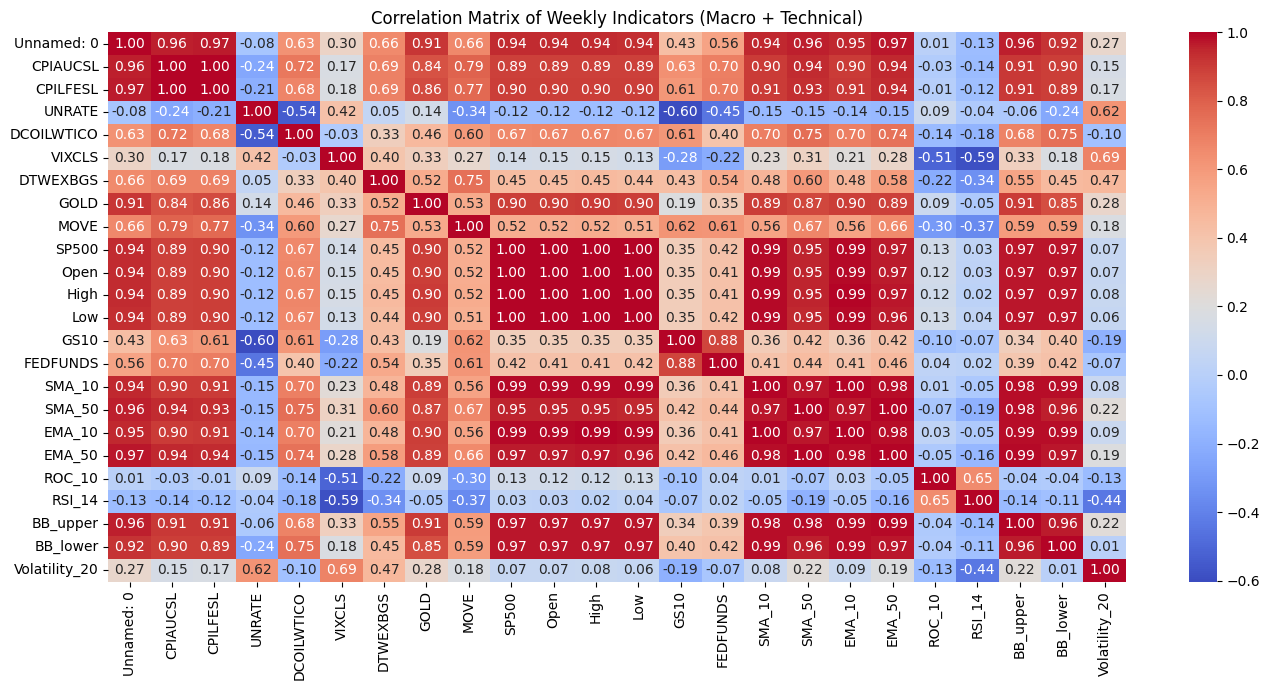

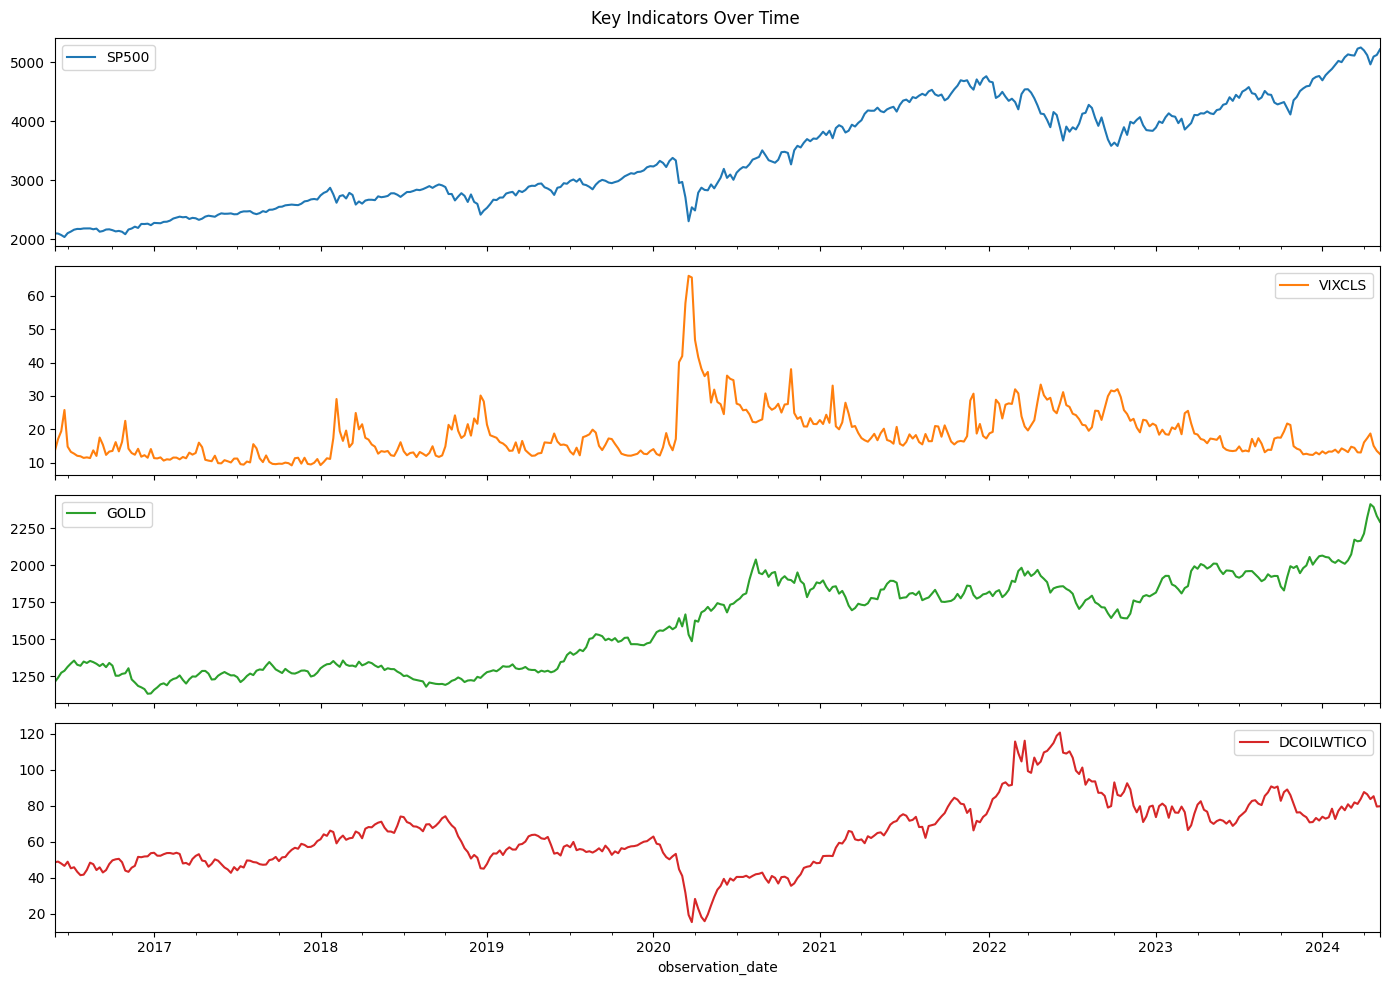

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
# Replace with your filename
df = pd.read_csv("data_final.csv", parse_dates=["observation_date"])

# === 2. Overview ===
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nDate Range:", df["observation_date"].min(), "to", df["observation_date"].max())
print("\nMissing Values:\n", df.isna().sum())

# === 3. Basic Stats ===
display(df.describe())


# === 4. Correlation Heatmap ===
# Drop non-numeric columns like 'Date'
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(14, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Weekly Indicators (Macro + Technical)")
plt.tight_layout()
plt.show()

# === 5. Time Series Preview ===
df.set_index("observation_date")[["SP500", "VIXCLS", "GOLD", "DCOILWTICO"]].plot(subplots=True, figsize=(14, 10), title="Key Indicators Over Time")
plt.tight_layout()
plt.show()
